## sigMF IQ file SVD reconstruction: PTT analog

In [1]:
import os
import torch #, torchvision
import numpy as np
from matplotlib import pyplot
from scipy import signal
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from torch import istft
global GPU, n_fft
GPU = 1
eps = 1e-15
plt.style.use('default')
device = torch.device('cuda:1')
print('Torch version =', torch.__version__, 'CUDA version =', torch.version.cuda)
print('CUDA Device:', device)
print('Is cuda available? =',torch.cuda.is_available())

Torch version = 1.6.0 CUDA version = 10.2
CUDA Device: cuda:1
Is cuda available? = True


In [2]:
# %matplotlib notebook
# %matplotlib inline

#### Machine paths

In [3]:
path_test_1msps_lora125 = "/home/david/sigMF_ML/RF/RF_class/testing_data_1msps/lora125/" # ACE
path_test_1msps_click = "/home/david/sigMF_ML/RF/RF_class/testing_data_1msps/click/" # ACE
path_test_1msps_mix = "/home/david/sigMF_ML/RF/RF_class/testing_data_1msps/mix/" # ACE
path_test_1msps_lora250 = "/home/david/sigMF_ML/RF/RF_class/testing_data_1msps/lora250/" # ACE
path_test_1msps_gd55 = "/home/david/sigMF_ML/RF/RF_class/testing_data_1msps/gd55/" # ACE
path_test_1msps_tyt = "/home/david/sigMF_ML/RF/RF_class/testing_data_1msps/tyt/" # ACE
path_test_1msps_light = "/home/david/sigMF_ML/RF/RF_class/testing_data_1msps/light" # ACE
path_test_1msps_vod = "/home/david/sigMF_ML/RF/RF_class/testing_data_1msps/vod/" # ACE
path_test_1msps_sado = "/home/david/sigMF_ML/RF/RF_class/testing_data_1msps/sado/" # ACE
path_test_1msps_nfm = "/home/david/sigMF_ML/RF/RF_class/testing_data_1msps/nfm/" # ACE
path_test_1msps_ysf = "/home/david/sigMF_ML/RF/RF_class/testing_data_1msps/ysf/" # ACE
path_test_1msps_noise = "/home/david/sigMF_ML/RF/RF_class/testing_data_1msps/noise/" # ACE

In [4]:
path_test_5msps_lora125 = "/home/david/sigMF_ML/RF/5msps_test_b205/lora125/" # ACE
path_test_5msps_click = "/home/david/sigMF_ML/RF/5msps_test_b205/click/" # ACE
path_test_5msps_mix = "/home/david/sigMF_ML/RF/5msps_test_b205/mix/" # ACE
path_test_5msps_lora250 = "/home/david/sigMF_ML/RF/5msps_test_b205/lora250/" # ACE
path_test_5msps_gd55 = "/home/david/sigMF_ML/RF/5msps_test_b205/GD55/" # ACE
path_test_5msps_tyt = "/home/david/sigMF_ML/RF/5msps_test_b205/TYT/" # ACE
path_test_5msps_light = "/home/david/sigMF_ML/RF/5msps_test_b205/light" # ACE
path_test_5msps_vod = "/home/david/sigMF_ML/RF/5msps_test_b205/vodeson/" # ACE
path_test_5msps_sado = "/home/david/sigMF_ML/RF/5msps_test_b205/sado/" # ACE
path_test_5msps_nfm = "/home/david/sigMF_ML/RF/5msps_test_b205/nfm/" # ACE
path_test_5msps_uv5r = "/home/david/sigMF_ML/RF/5msps_test_b205/UV5R/" # ACE
path_test_5msps_vx8 = "/home/david/sigMF_ML/RF/5msps_test_b205/VX8/" # ACE
path_test_5msps_ysf = "/home/david/sigMF_ML/RF/5msps_test_b205/YSF/" # ACE
path_test_5msps_noise = "/home/david/sigMF_ML/RF/5msps_test_b205/noise/" # ACE

In [5]:
path_test_10msps_lora125 = "/home/david/sigMF_ML/RF/10msps_test_b205/lora125/" # ACE
path_test_10msps_click = "/home/david/sigMF_ML/RF/10msps_test_b205/click/" # ACE
path_test_10msps_mix = "/home/david/sigMF_ML/RF/10msps_test_b205/mix/" # ACE
path_test_10msps_lora250 = "/home/david/sigMF_ML/RF/10msps_test_b205/lora250/" # ACE
path_test_10msps_gd55 = "/home/david/sigMF_ML/RF/10msps_test_b205/GD55/" # ACE
path_test_10msps_tyt = "/home/david/sigMF_ML/RF/10msps_test_b205/TYT/" # ACE
path_test_10msps_light = "/home/david/sigMF_ML/RF/10msps_test_b205/light" # ACE
path_test_10msps_vod = "/home/david/sigMF_ML/RF/10msps_test_b205/vodeson/" # ACE
path_test_10msps_sado = "/home/david/sigMF_ML/RF/10msps_test_b205/sado/" # ACE
path_test_10msps_nfm = "/home/david/sigMF_ML/RF/10msps_test_b205/nfm/" # ACE
path_test_10msps_uv5r = "/home/david/sigMF_ML/RF/10msps_test_b205/UV5R/" # ACE
path_test_10msps_vx8 = "/home/david/sigMF_ML/RF/10msps_test_b205/VX8/" # ACE
path_test_10msps_ysf = "/home/david/sigMF_ML/RF/10msps_test_b205/YSF/" # ACE
path_test_10msps_noise = "/home/david/sigMF_ML/RF/10msps_test_b205/noise/" # ACE

In [6]:
path_test_25msps_click = "/home/david/sigMF_ML/RF/25msps_test_b205/click/" # ACE
path_test_25msps_gd55 = "/home/david/sigMF_ML/RF/25msps_test_b205/gd55/" # ACE
path_test_25msps_light = "/home/david/sigMF_ML/RF/25msps_test_b205/light/" # ACE
path_test_25msps_lora125 = "/home/david/sigMF_ML/RF/25msps_test_b205/lora125/" # ACE
path_test_25msps_lora250 = "/home/david/sigMF_ML/RF/25msps_test_b205/lora250/" # ACE
path_test_25msps_noise = "/home/david/sigMF_ML/RF/25msps_test_b205/noise/" # ACE
path_test_25msps_vod = "/home/david/sigMF_ML/RF/25msps_test_b205/vod/" # ACE
path_test_25msps_sado = "/home/david/sigMF_ML/RF/25msps_test_b205/sado/" # ACE
path_test_25msps_uv5r = "/home/david/sigMF_ML/RF/25msps_test_b205/uv5r/" # ACE
path_test_25msps_vx8 = "/home/david/sigMF_ML/RF/25msps_test_b205/vx8/" # ACE
path_test_25msps_ysf = "/home/david/sigMF_ML/RF/25msps_test_b205/ysf/" # ACE
path_test_25msps_tyt = "/home/david/sigMF_ML/RF/25msps_test_b205/tyt/" # ACE
path_test_25msps_noise = "/home/david/sigMF_ML/RF/25msps_test_b205/noise/" # ACE

In [7]:
path2_test_25msps_click = "/home/david/sigMF_ML/RF/25msps_test/click/" # ACE
path2_test_25msps_gd55 = "/home/david/sigMF_ML/RF/25msps_test/gd55/" # ACE
path2_test_25msps_light = "/home/david/sigMF_ML/RF/25msps_test/light/" # ACE
path2_test_25msps_lora125 = "/home/david/sigMF_ML/RF/25msps_test/lora125/" # ACE
path2_test_25msps_lora250 = "/home/david/sigMF_ML/RF/25msps_test/lora250/" # ACE
path2_test_25msps_noise = "/home/david/sigMF_ML/RF/25msps_test/noise/" # ACE
path2_test_25msps_vod = "/home/david/sigMF_ML/RF/25msps_test/vod/" # ACE
path2_test_25msps_sado = "/home/david/sigMF_ML/RF/25msps_test/sado/" # ACE
path2_test_25msps_uv5r = "/home/david/sigMF_ML/RF/25msps_test/uv5r/" # ACE
path2_test_25msps_vx8 = "/home/david/sigMF_ML/RF/25msps_test/vx8/" # ACE
path2_test_25msps_ysf = "/home/david/sigMF_ML/RF/25msps_test/ysf/" # ACE
path2_test_25msps_tyt = "/home/david/sigMF_ML/RF/25msps_test/tyt/" # ACE
path2_test_25msps_noise = "/home/david/sigMF_ML/RF/25msps_test_b205/noise/" # ACE

In [19]:
path_sawtooth_b210 = "/home/david/sigMF_ML/RF/sawtooth_testdata/B210/" # ACE
path_sawtooth_b210_3amp = "/home/david/sigMF_ML/RF/sawtooth_testdata/B210_3amp/" # ACE

#### Read in files as real

In [9]:
# tyt_1msps = np.fromfile(path_test_1msps_tyt+"UHF_TYT_DMR_voice2_test1.sigmf-data", dtype="float32")
# tyt_5msps = np.fromfile(path_test_5msps_tyt+"UHF_TYT_DMR_test1.sigmf-data", dtype="float32")
# tyt_10msps = np.fromfile(path_test_10msps_tyt+"UHF_TYT_DMR_test1.sigmf-data", dtype="float32")
# tyt_25msps = np.fromfile(path_test_25msps_tyt+"UHF_TYT_DMR_test1.sigmf-data", dtype="float32")

#### Read in files as complex

In [10]:
# tyt_1msps_complex = np.fromfile(path_test_1msps_tyt+"UHF_TYT_DMR_voice2_test2.sigmf-data", np.complex64)
# tyt_5msps_complex = np.fromfile(path_test_5msps_tyt+"UHF_TYT_DMR_test1.sigmf-data", np.complex64)
# tyt_10msps_complex = np.fromfile(path_test_10msps_tyt+"UHF_TYT_DMR_test1.sigmf-data", np.complex64)
# tyt_25msps_complex = np.fromfile(path_test_25msps_tyt+"UHF_TYT_DMR_test1.sigmf-data", np.complex64)

In [11]:
# lora125_1msps_complex = np.fromfile(path_test_1msps_lora125+"lora125_test1.sigmf-data", np.complex64)
# lora125_5msps_complex = np.fromfile(path_test_5msps_lora125+"lora125_test1.sigmf-data", np.complex64)
# lora125_10msps_complex = np.fromfile(path_test_10msps_lora125+"lora125_test1.sigmf-data", np.complex64)
# lora125_25msps_complex = np.fromfile(path_test_25msps_lora125+"lora125_test1.sigmf-data", np.complex64)

In [15]:
msps_1 = 1e6
msps_5 = 5e6
msps_10 = 10e6
msps_25 = 25e6

In [16]:
fft_1msps = 1024
fft_5msps = 1024*5
fft_10msps = 1024*10
fft_25msps = 1024*25

In [11]:
saw_1msps_complex = np.fromfile(path_sawtooth_b210+"saw_test_1msps_b210.sigmf-data", np.complex64)
saw_5msps_complex = np.fromfile(path_sawtooth_b210+"saw_test_5msps_b210.sigmf-data", np.complex64)
saw_10msps_complex = np.fromfile(path_sawtooth_b210+"saw_test_10msps_b210.sigmf-data", np.complex64)
saw_25msps_complex = np.fromfile(path_sawtooth_b210+"saw_test_25msps_b210.sigmf-data", np.complex64)

In [14]:
saw_1msps_angle = np.angle(saw_1msps_complex)
saw_5msps_angle = np.angle(saw_5msps_complex)
saw_10msps_angle = np.angle(saw_10msps_complex)
saw_25msps_angle = np.angle(saw_25msps_complex)

In [17]:
saw_1msps_3amp_complex = np.fromfile(path_sawtooth_b210_3amp+"sawtooth_3amp_1msps_b210.sigmf-data", np.complex64)
saw_5msps_3amp_complex = np.fromfile(path_sawtooth_b210_3amp+"sawtooth_3amp_5msps_b210.sigmf-data", np.complex64)
saw_10msps_3amp_complex = np.fromfile(path_sawtooth_b210_3amp+"sawtooth_3amp_10msps_b210.sigmf-data", np.complex64)
saw_25msps_3amp_complex = np.fromfile(path_sawtooth_b210_3amp+"sawtooth_3amp_25msps_b210.sigmf-data", np.complex64)

In [20]:
saw_1msps_3amp_angle = np.angle(saw_1msps_3amp_complex)
saw_5msps_3amp_angle = np.angle(saw_5msps_3amp_complex)
saw_10msps_3amp_angle = np.angle(saw_10msps_3amp_complex)
saw_25msps_3amp_angle = np.angle(saw_25msps_3amp_complex)

In [21]:
len(saw_1msps_3amp_angle)

2000000

In [22]:
path_plot_fig = "/home/david/sigMF_ML/RF/RF_class/plot_data/" # ACE
os.chdir(path_plot_fig)

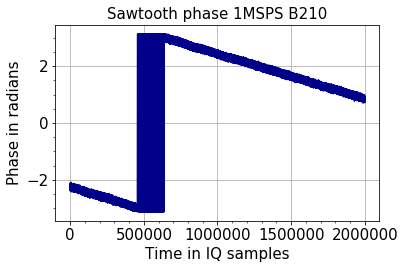

In [42]:
plt.rcParams.update({'font.size': 15})
fig1 = plt.figure()
pyplot.plot(saw_1msps_3amp_angle[0:len(saw_1msps_3amp_angle)], color ='darkblue')
# pyplot.plot(saw_1msps_3amp_angle[0:5000], color ='darkblue')
# pyplot.plot(saw_1msps_angle[520:580], color ='darkblue')
# plt.legend(loc='lower right', fontsize=13)
# Put a legend to the right of the current axis
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Sawtooth phase 1MSPS B210', fontsize=15)
plt.xlabel('Time in IQ samples')
plt.ylabel('Phase in radians')
plt.grid()
plt.minorticks_on()
# plt.yticks([.2, .4, .6, .8, 1.0])
# plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
# plt.tight_layout()
axes=plt.gca()
# axes.set_aspect(7)
plt.subplots_adjust(left=0.15)
plt.subplots_adjust(bottom=0.20)
fig1.set_size_inches(6.0, 4.0)
fig1.savefig('sawtooth_phase_1msps_3amp_b210_20220206.pdf', format="pdf")
pyplot.show()

In [62]:
len(saw_5msps_3amp_angle)

10000000

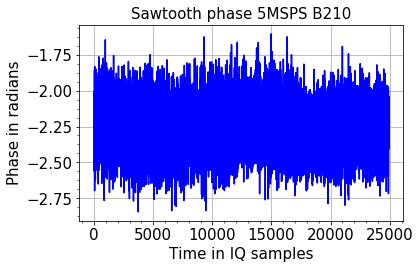

In [39]:
plt.rcParams.update({'font.size': 15})
fig1 = plt.figure()
# pyplot.plot(saw_5msps_3amp_angle[100:len(saw_5msps_3amp_angle)], color ='blue')
pyplot.plot(saw_5msps_3amp_angle[100:25000], color ='blue')
# pyplot.plot(saw_5msps_10amp_angle[1000:1100], color ='darkblue')
# pyplot.plot(saw_5msps_10amp_angle[2999900:3000000], color ='darkblue')
# pyplot.plot(saw_1msps_angle[520:580], color ='darkblue')
# plt.legend(loc='lower right', fontsize=13)
# Put a legend to the right of the current axis
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Sawtooth phase 5MSPS B210', fontsize=15)
plt.xlabel('Time in IQ samples')
plt.ylabel('Phase in radians')
plt.grid()
plt.minorticks_on()
# plt.yticks([.2, .4, .6, .8, 1.0])
# plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
# plt.tight_layout()
axes=plt.gca()
# axes.set_aspect(7)
plt.subplots_adjust(left=0.15)
plt.subplots_adjust(bottom=0.20)
fig1.set_size_inches(6.0, 4.0)
fig1.savefig('sawtooth_phase_5msps_3amp_b210_20220206.pdf', format="pdf")
pyplot.show()

In [19]:
len(saw_10msps_10amp_angle)

20000000

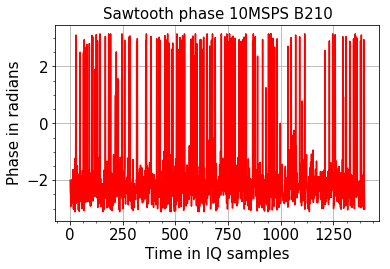

In [41]:
plt.rcParams.update({'font.size': 15})
fig1 = plt.figure()
# pyplot.plot(saw_10msps_3amp_angle[100:len(saw_10msps_3amp_angle)], color ='darkblue')
pyplot.plot(saw_10msps_3amp_angle[100:1500], color ='red')
# pyplot.plot(saw_1msps_angle[520:580], color ='darkblue')
# plt.legend(loc='lower right', fontsize=13)
# Put a legend to the right of the current axis
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Sawtooth phase 10MSPS B210', fontsize=15)
plt.xlabel('Time in IQ samples')
plt.ylabel('Phase in radians')
plt.grid()
plt.minorticks_on()
# plt.yticks([.2, .4, .6, .8, 1.0])
# plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
# plt.tight_layout()
axes=plt.gca()
# axes.set_aspect(7)
plt.subplots_adjust(left=0.15)
plt.subplots_adjust(bottom=0.20)
fig1.set_size_inches(6.0, 4.0)
fig1.savefig('sawtooth_phase_10msps_3amp_b210_20220206.pdf', format="pdf")
pyplot.show()

In [24]:
len(saw_25msps_10amp_angle)

50000000

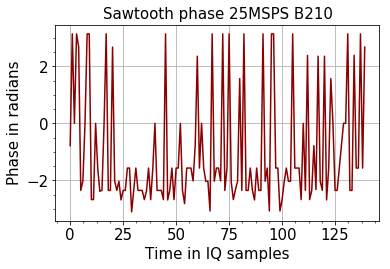

In [37]:
plt.rcParams.update({'font.size': 15})
fig1 = plt.figure()
# pyplot.plot(saw_25msps_10amp_angle[10:100], color ='darkblue')
# pyplot.plot(saw_25msps_3amp_angle[10:len(saw_25msps_3amp_angle)//100], color ='darkblue')
pyplot.plot(saw_25msps_3amp_angle[10:150], color ='darkred')
# pyplot.plot(saw_25msps_10amp_angle[10:100], color ='darkblue')
# pyplot.plot(saw_1msps_angle[520:580], color ='darkblue')
# plt.legend(loc='lower right', fontsize=13)
# Put a legend to the right of the current axis
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Sawtooth phase 25MSPS B210', fontsize=15)
plt.xlabel('Time in IQ samples')
plt.ylabel('Phase in radians')
plt.grid()
plt.minorticks_on()
# plt.yticks([.2, .4, .6, .8, 1.0])
# plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
# plt.tight_layout()
axes=plt.gca()
# axes.set_aspect(7)
plt.subplots_adjust(left=0.15)
plt.subplots_adjust(bottom=0.20)
fig1.set_size_inches(6.0, 4.0)
fig1.savefig('sawtooth_phase_25msps_3amp_b210_20220206.pdf', format="pdf")
pyplot.show()

In [15]:
path_plot_fig = "/home/david/sigMF_ML/RF/RF_class/plot_data/" # ACE
os.chdir(path_plot_fig)

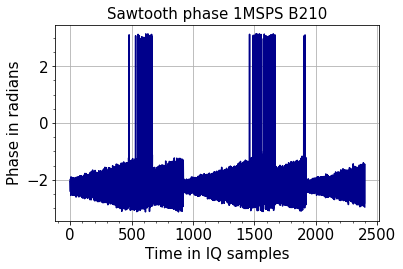

In [63]:
plt.rcParams.update({'font.size': 15})
fig1 = plt.figure()
pyplot.plot(saw_1msps_angle[100:2500], color ='darkblue')
# pyplot.plot(saw_1msps_angle[520:580], color ='darkblue')
# plt.legend(loc='lower right', fontsize=13)
# Put a legend to the right of the current axis
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Sawtooth phase 1MSPS B210', fontsize=15)
plt.xlabel('Time in IQ samples')
plt.ylabel('Phase in radians')
plt.grid()
plt.minorticks_on()
# plt.yticks([.2, .4, .6, .8, 1.0])
# plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
# plt.tight_layout()
axes=plt.gca()
# axes.set_aspect(7)
plt.subplots_adjust(left=0.15)
plt.subplots_adjust(bottom=0.20)
fig1.set_size_inches(6.0, 4.0)
fig1.savefig('sawtooth_phase_1msps_b210_20220204.pdf', format="pdf")
pyplot.show()

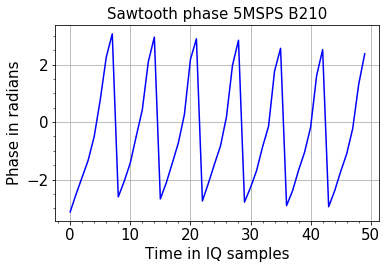

In [52]:
plt.rcParams.update({'font.size': 15})
fig1 = plt.figure()
pyplot.plot(saw_5msps_angle[100:150], color ='blue')
# plt.legend(loc='lower right', fontsize=13)
# Put a legend to the right of the current axis
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Sawtooth phase 5MSPS B210', fontsize=15)
plt.xlabel('Time in IQ samples')
plt.ylabel('Phase in radians')
plt.grid()
plt.minorticks_on()
# plt.yticks([.2, .4, .6, .8, 1.0])
# plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
# plt.tight_layout()
axes=plt.gca()
# axes.set_aspect(7)
plt.subplots_adjust(left=0.15)
plt.subplots_adjust(bottom=0.20)
fig1.set_size_inches(6.0, 4.0)
fig1.savefig('sawtooth_phase_5msps_b210_20220204.pdf', format="pdf")
pyplot.show()

In [71]:
len(saw_10msps_angle)

20000000

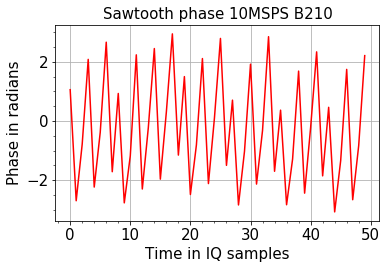

In [80]:
plt.rcParams.update({'font.size': 15})
fig1 = plt.figure()
pyplot.plot(saw_10msps_angle[100:150], color ='red')
# pyplot.plot(saw_10msps_angle[100:200], color ='red')
# plt.legend(loc='lower right', fontsize=13)
# Put a legend to the right of the current axis
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Sawtooth phase 10MSPS B210', fontsize=15)
plt.xlabel('Time in IQ samples')
plt.ylabel('Phase in radians')
plt.grid()
plt.minorticks_on()
# plt.yticks([.2, .4, .6, .8, 1.0])
# plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
# plt.tight_layout()
axes=plt.gca()
# axes.set_aspect(7)
plt.subplots_adjust(left=0.15)
plt.subplots_adjust(bottom=0.20)
fig1.set_size_inches(6.0, 4.0)
fig1.savefig('sawtooth_phase_10msps_b210_20220204.pdf', format="pdf")
pyplot.show()

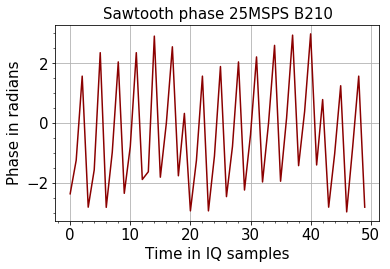

In [70]:
plt.rcParams.update({'font.size': 15})
fig1 = plt.figure()
pyplot.plot(saw_25msps_angle[100:150], color ='darkred')
# pyplot.plot(saw_25msps_angle[100:500], color ='darkred')
# plt.legend(loc='lower right', fontsize=13)
# Put a legend to the right of the current axis
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Sawtooth phase 25MSPS B210', fontsize=15)
plt.xlabel('Time in IQ samples')
plt.ylabel('Phase in radians')
plt.grid()
plt.minorticks_on()
# plt.yticks([.2, .4, .6, .8, 1.0])
# plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
# plt.tight_layout()
axes=plt.gca()
# axes.set_aspect(7)
plt.subplots_adjust(left=0.15)
plt.subplots_adjust(bottom=0.20)
fig1.set_size_inches(6.0, 4.0)
fig1.savefig('sawtooth_phase_25msps_b210_20220204.pdf', format="pdf")
pyplot.show()

In [55]:
2.297*2

4.594

In [64]:
# tyt_1msps_angle = np.angle(tyt_1msps_complex)
# tyt_5msps_angle = np.angle(tyt_5msps_complex)
# tyt_10msps_angle = np.angle(tyt_10msps_complex)
# tyt_25msps_angle = np.angle(tyt_25msps_complex)

In [65]:
# pyplot.plot(tyt_1msps_angle[0:10000], color ='darkblue')
# # pyplot.plot(tyt_5msps_angle[0:100], color ='blue')
# pyplot.show()

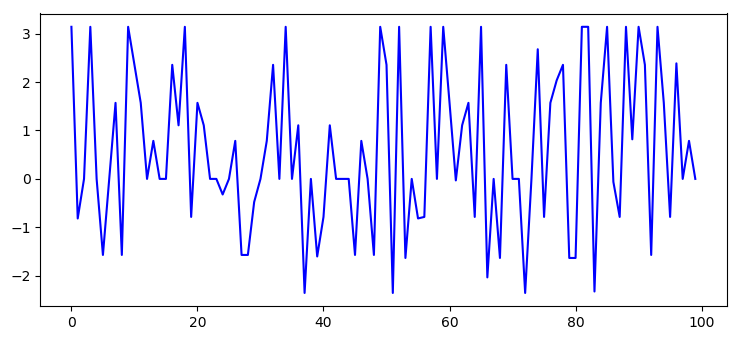

In [201]:
# pyplot.plot(tyt_1msps_angle[0:10000], color ='darkblue')
pyplot.plot(tyt_5msps_angle[6000:6100], color ='blue')
pyplot.show()

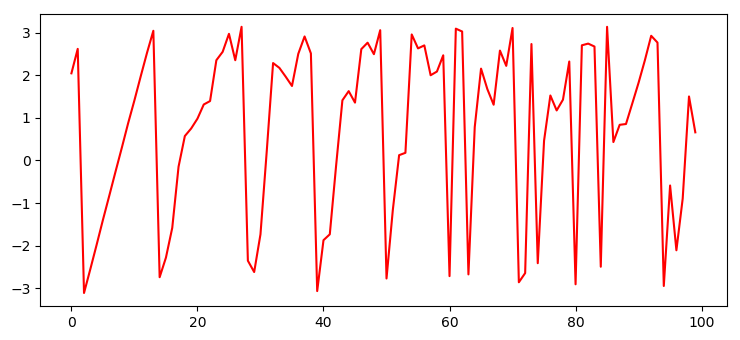

In [194]:
pyplot.plot(tyt_10msps_angle[0:100], color ='red')
pyplot.show()

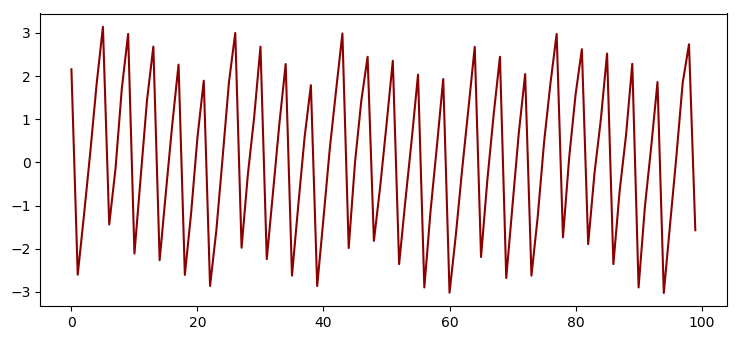

In [209]:
pyplot.plot(tyt_25msps_angle[1000:1100], color ='darkred')
pyplot.show()

In [159]:
lora125_1msps_angle = np.angle(lora125_1msps_complex)
lora125_5msps_angle = np.angle(lora125_5msps_complex)
lora125_10msps_angle = np.angle(lora125_10msps_complex)
lora125_25msps_angle = np.angle(lora125_25msps_complex)

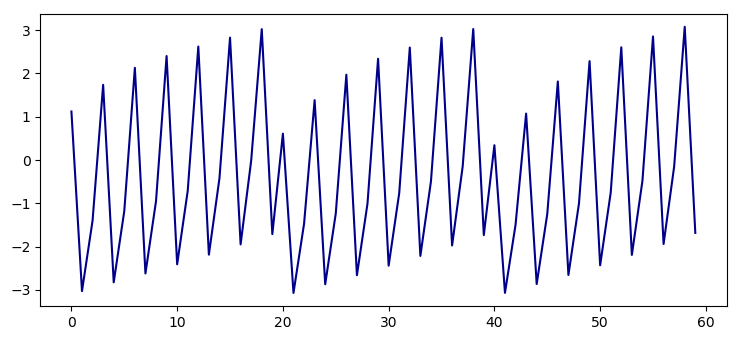

In [231]:
pyplot.plot(lora125_1msps_angle[1000:1060], color ='darkblue')
# pyplot.plot(tyt_5msps_angle[0:100], color ='blue')
pyplot.show()

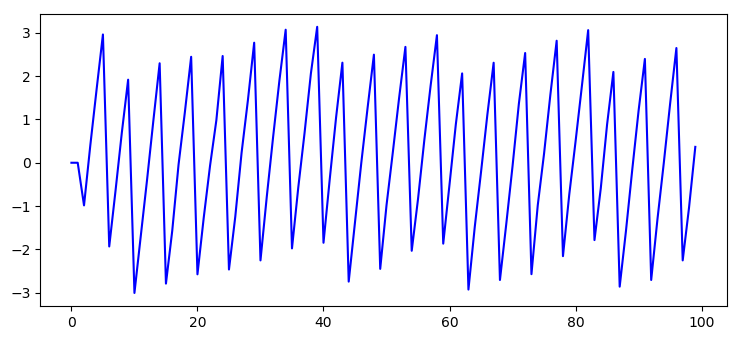

In [239]:
pyplot.plot(lora125_5msps_angle[0:100], color ='blue')
pyplot.show()

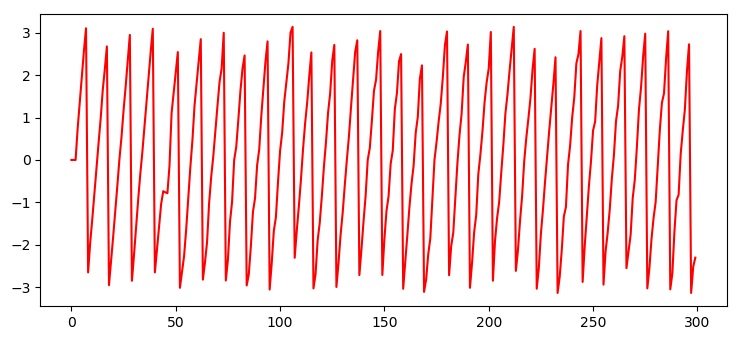

In [234]:
pyplot.plot(lora125_10msps_angle[0:300], color ='red')
pyplot.show()

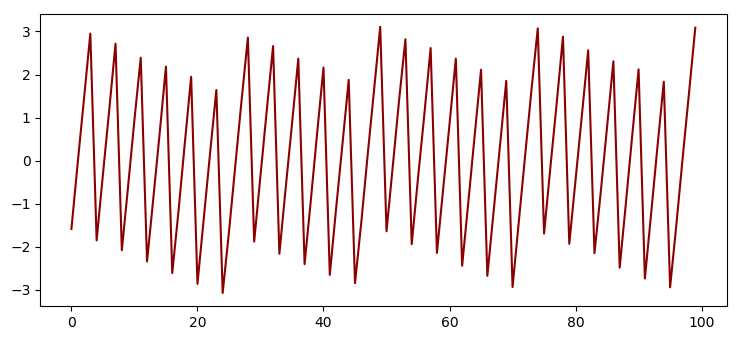

In [238]:
pyplot.plot(lora125_25msps_angle[1000:1100], color ='darkred')
pyplot.show()

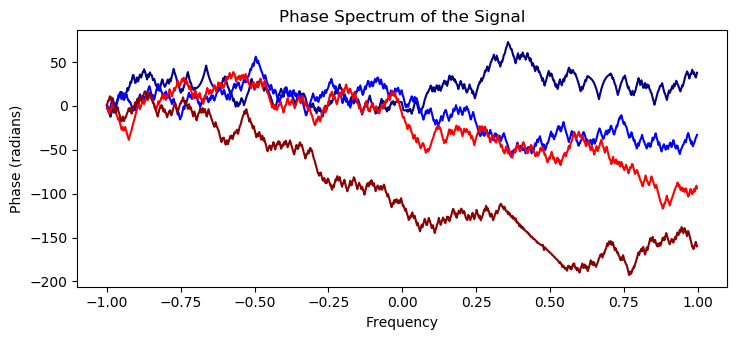

In [112]:
# plotting the phase spectrum of the signal 

pyplot.phase_spectrum(lora125_1msps_complex[0:1000], color ='darkblue')
pyplot.phase_spectrum(lora125_5msps_complex[0:1000], color ='blue') 
pyplot.phase_spectrum(lora125_10msps_complex[0:1000], color ='red')
pyplot.phase_spectrum(lora125_25msps_complex[0:1000], color ='darkred')

# pyplot.phase_spectrum(lora125_1msps_complex, color ='darkblue')
# pyplot.phase_spectrum(lora125_5msps_complex, color ='blue') 
# pyplot.phase_spectrum(lora125_10msps_complex, color ='red')
# pyplot.phase_spectrum(lora125_25msps_complex, color ='darkred')

# pyplot.phase_spectrum(lora125_1msps_complex[0:1000000], Fs=msps_1,sides='twosided',color ='darkblue')
# pyplot.phase_spectrum(lora125_5msps_complex[0:1000000], Fs=msps_5,sides='twosided',color ='blue') 
# pyplot.phase_spectrum(lora125_10msps_complex[0:1000000], Fs=msps_10,sides='twosided',color ='red')
# pyplot.phase_spectrum(lora125_25msps_complex[0:1000000], Fs=msps_25,sides='twosided',color ='darkred')


pyplot.title("Phase Spectrum of the Signal")
pyplot.show()

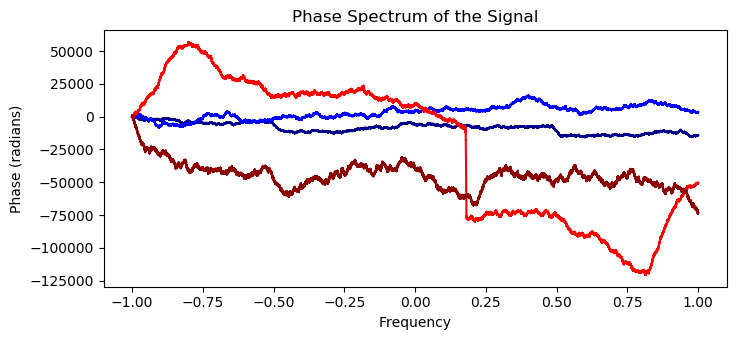

In [216]:
# plotting the phase spectrum of the signal 
# pyplot.phase_spectrum(tyt_1msps_complex[0:10000], Fs=msps_1,sides='twosided', color ='darkblue')
# pyplot.phase_spectrum(tyt_5msps_complex[0:10000], Fs=msps_5, sides='twosided',color ='blue') 
# pyplot.phase_spectrum(tyt_10msps_complex[0:10000], Fs=msps_10, sides='twosided',color ='red')
# pyplot.phase_spectrum(tyt_25msps_complex[0:10000], Fs=msps_25, sides='twosided',color ='darkred')

# pyplot.phase_spectrum(tyt_1msps_complex[0:10000], color ='darkblue')
# pyplot.phase_spectrum(tyt_5msps_complex[0:10000], color ='blue') 
# pyplot.phase_spectrum(tyt_10msps_complex[0:10000], color ='red')
# pyplot.phase_spectrum(tyt_25msps_complex[0:10000], color ='darkred')

pyplot.phase_spectrum(tyt_1msps_complex, color ='darkblue')
pyplot.phase_spectrum(tyt_5msps_complex, color ='blue') 
pyplot.phase_spectrum(tyt_10msps_complex, color ='red')
pyplot.phase_spectrum(tyt_25msps_complex, color ='darkred')


pyplot.title("Phase Spectrum of the Signal")
pyplot.show()

#### torch GPU Cuda stft

In [20]:
def gpu(db):
    I = db[0::2]
    Q = db[1::2]
    start = timer()
    w = n_fft
    win = torch.hann_window(w, periodic=True, dtype=None, layout=torch.strided, requires_grad=False).cuda(GPU)
    I_stft = torch.stft(torch.tensor(I).cuda(GPU), n_fft=n_fft, hop_length=n_fft//2, win_length=w, window=win, center=True, normalized=True, onesided=True)
    Q_stft = torch.stft(torch.tensor(Q).cuda(GPU), n_fft=n_fft, hop_length=n_fft//2, win_length=w, window=win, center=True, normalized=True, onesided=True)
    X_stft = I_stft[...,0] + Q_stft[...,0] + I_stft[...,1] + -1*Q_stft[...,1]
    X_stft = torch.cat((X_stft[n_fft//2:],X_stft[:n_fft//2]))
    end = timer()
    gpu_stft_time = end - start
    print('GPU STFT time = ', gpu_stft_time)
    torch.cuda.empty_cache()
    return I_stft, Q_stft, gpu_stft_time

#### FOR plotting spectrum: one sided must be false on torch.stft

In [21]:
def gpu_plot(db):
    I = db[0::2]
    Q = db[1::2]
    w = n_fft
    win = torch.hann_window(w, periodic=True, dtype=None, layout=torch.strided, requires_grad=False).cuda(GPU)
    I_stft = torch.stft(torch.tensor(I).cuda(GPU), n_fft=n_fft, hop_length=n_fft//2, win_length=w, window=win, center=True, normalized=True, onesided=False)
    Q_stft = torch.stft(torch.tensor(Q).cuda(GPU), n_fft=n_fft, hop_length=n_fft//2, win_length=w, window=win, center=True, normalized=True, onesided=False)
    X_stft = I_stft[...,0] + Q_stft[...,0] + I_stft[...,1] + -1*Q_stft[...,1]
    X_stft = torch.cat((X_stft[n_fft//2:],X_stft[:n_fft//2]))
    torch.cuda.empty_cache()
    return X_stft

#### scipy CPU stft function for reference

In [17]:
# def cpu(db, msps):
#     t = len(db)
#     db2 = db[0::]
#     start = timer()
#     db = db.astype(np.float32).view(np.complex64)
#     I_t, I_f, Z = signal.stft(db, fs=msps, nperseg=n_fft, return_onesided=False)
#     Z = np.vstack([Z[n_fft//2:], Z[:n_fft//2]])
#     end = timer()
#     cpu_stft_time = end - start
#     print('CPU STFT time = ', cpu_stft_time)
#     return Z

In [25]:
def cpu(db, msps, n_fft):
    t = len(db)
    db2 = db[0::]
    db = db.astype(np.float32).view(np.complex64)
    I_t, I_f, Z = signal.stft(db, fs=msps, nperseg=n_fft, return_onesided=False)
    Z = np.vstack([Z[n_fft//2:], Z[:n_fft//2]])
    return Z

### Plotting

In [66]:
msps_1 = 1e6
msps_5 = 5e6
msps_10 = 10e6
msps_25 = 25e6

In [67]:
fft_1msps = 1024
fft_5msps = 1024*5
fft_10msps = 1024*10
fft_25msps = 1024*25

In [130]:
stft_tyt_1msps = cpu(tyt_1msps, msps_1, fft_1msps)
stft_tyt_5msps = cpu(tyt_5msps, msps_5, fft_5msps)

In [132]:
# plotting the phase spectrum of the signal 
# pyplot.phase_spectrum(tyt_1msps_complex[0:10000], Fs=msps_1,sides='twosided', color ='darkblue')
# pyplot.phase_spectrum(tyt_5msps_complex[0:10000], Fs=msps_5, sides='twosided',color ='blue') 
# pyplot.phase_spectrum(tyt_10msps_complex[0:10000], Fs=msps_10, sides='twosided',color ='red')
# pyplot.phase_spectrum(tyt_25msps_complex[0:10000], Fs=msps_25, sides='twosided',color ='darkred')

# pyplot.phase_spectrum(stft_tyt_1msps, color ='darkblue')
# pyplot.phase_spectrum(stft_tyt_5msps, color ='blue') 
# pyplot.phase_spectrum(tyt_10msps_complex, color ='red')
# pyplot.phase_spectrum(tyt_25msps_complex, color ='darkred')


# pyplot.title("Phase Spectrum of the Signal")
# pyplot.show()

In [38]:
tyt_1msps.shape

(20000000,)

In [39]:
tyt_1msps[0:5]

array([0.03845343, 0.01178018, 0.03836188, 0.01193277, 0.03839239],
      dtype=float32)

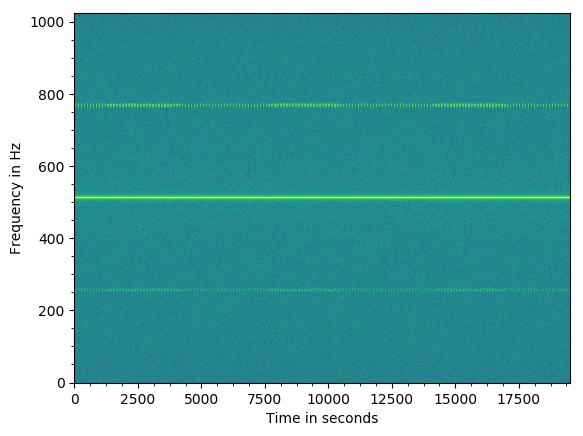

In [37]:
# plt.figure(figsize=(9, 6))
fig1 = plt.figure()
# plt.imshow(20*np.log10(np.abs(stft_tyt_1msps+eps)), vmin=-70, vmax=5, aspect='auto', origin='lower')
plt.imshow(20*np.log10(np.abs(stft_tyt_1msps+eps)), aspect='auto', origin='lower')
# title = "Full spectrum CPU"
# plt.title(title)
plt.xlabel('Time in seconds')
plt.ylabel('Frequency in Hz')
plt.minorticks_on()
# plt.yticks(np.arange(0,60, 6))
# fig1.savefig('full_spectrum_cpu.pdf', format="pdf")
# plt.show()